In [1]:
import os
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
working_dir = os.getcwd()
print(f"You are now working in {working_dir}")
print("If you need to change to the parent directory, run the cell below")

You are now working in c:\Users\fredd\Desktop\Studier\Project5\flowers\flowers_CNN\jupyter_notebooks
If you need to change to the parent directory, run the cell below


In [3]:
os.chdir(os.path.dirname(working_dir))

new_working_dir = os.getcwd()
print(f"You have now changed your working directory to {new_working_dir}")

You have now changed your working directory to c:\Users\fredd\Desktop\Studier\Project5\flowers\flowers_CNN


In [4]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(working_dir) and version in os.listdir(working_dir + '/outputs'):
    print("This version already exists, create a new version if you are working on a new version")
    pass
else:
    os.makedirs(name=file_path)

<hr>

### Search for non-image files


In [ ]:
"""
This function will search through the raw dataset
for files that doesn´t have the extensions
that we typed in at 'image_extension'.

When going through all the files the arrays for
image_files and non_image_files are filled with
result that in the end will be printed out.    
"""


def search_non_image_files(raw_dir):
    
    image_extension = ('.png', '.jpg', '.jpeg') # file extensions to search for
    
    non_image_files = [] # array for files without the extension searched for
    image_files = [] # array for image files with the extension searched for
    
    folders = os.listdir(raw_dir)
    for folder in folders:
        files = os.listdir(os.path.join(raw_dir, folder))
        
        for file in files: 
            file_location = os.path.join(raw_dir, folder, file)
            if not file.lower().endswith(image_extension):
                non_image_files.append(file_location)
            else:
                image_files.append(file_location)
    

    print("Total amount of folders searched:", len(folders))
    print("Total image files found:", len(image_files))
    print("Total non image files found:", len(non_image_files))
    
    return image_files, non_image_files

In [ ]:
search_non_image_files(raw_dir='inputs/dataset/raw/flower_photos')

### Split into train/validation/test sets

In [ ]:
import shutil
import random


def split_train_validation_test_images(image_dir, train_set_ratio, validation_set_ratio, test_set_ratio):
    
    # Check if the ratios are set to the correct total amount
    if train_set_ratio + validation_set_ratio + test_set_ratio != 1.0:
        print("The total of train_set_ratio, validation_set_ratio and test_set_ratio should be 1.0")
        return

    flowers = os.listdir(image_dir)
    
    # Creates train, validation and test folders if they don´t exist
    for folder in ['train', 'validation', 'test']:
        folder_path = os.path.join(image_dir, folder)
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)
        for flower in flowers:
            flower_folder_path = os.path.join(folder_path, flower)
            os.makedirs(flower_folder_path, exist_ok=True)

    # Moves images to the right sub-folder
    for flower in flowers:
        files = os.listdir(os.path.join(image_dir, flower))
        random.shuffle(files)

        train_set_files_qty = int(len(files) * train_set_ratio)
        validation_set_files_qty = int(len(files) * validation_set_ratio)

        count = 1
        for image_name in files:
            src_path = os.path.join(image_dir, flower, image_name)
            if count <= train_set_files_qty:
                dest_path = os.path.join(image_dir, 'train', flower, image_name)
            elif count <= (train_set_files_qty + validation_set_files_qty):
                dest_path = os.path.join(image_dir, 'validation', flower, image_name)
            else:
                dest_path = os.path.join(image_dir, 'test', flower, image_name)
            
            shutil.move(src_path, dest_path)
            count += 1

        # Deletes the inputfolder if it´s empty
        os.rmdir(os.path.join(image_dir, flower))

In [ ]:
split_train_validation_test_images(image_dir=f"inputs/dataset/raw/flower_photos",
                                   train_set_ratio=0.7,
                                   validation_set_ratio=0.1,
                                   test_set_ratio=0.2
                                   )

In [5]:
labels = os.listdir("inputs/dataset/raw/flower_photos/train")

print(f"Flower labels: {labels}")

Flower labels: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


* train - daisy: 3544 images
* train - dandelion: 5028 images
* train - roses: 3589 images
* train - sunflowers: 3914 images
* train - tulips: 4474 images
* validation - daisy: 506 images
* validation - dandelion: 718 images
* validation - roses: 512 images
* validation - sunflowers: 559 images
* validation - tulips: 639 images
* test - daisy: 1014 images
* test - dandelion: 1438 images
* test - roses: 1027 images
* test - sunflowers: 1119 images
* test - tulips: 1279 images




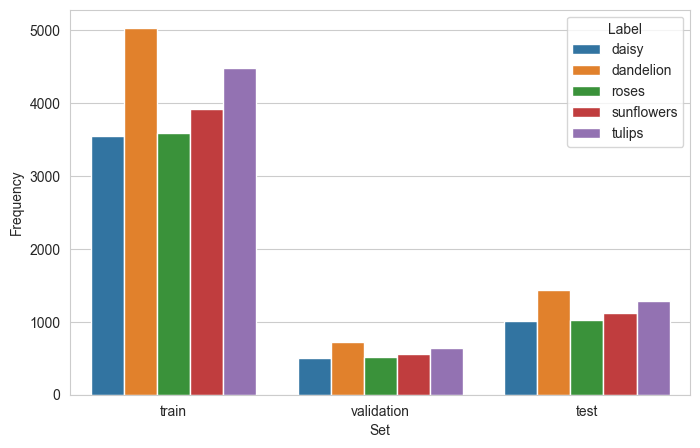

In [6]:
image_dirs = 'inputs/dataset/raw/flower_photos'

data = []


for folder in ['train', 'validation', 'test']:
    for label in labels:
        
        data.append({
            'Set': folder,
            'Label': label,
            'Frequency': int(len(os.listdir(image_dirs + '/' + folder + '/' + label)))
        })
        
        print(f"* {folder} - {label}: {len(os.listdir(image_dirs + '/' + folder + '/' + label))} images")


df_freq = pd.DataFrame(data)


print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png', bbox_inches='tight', dpi=150)
plt.show()